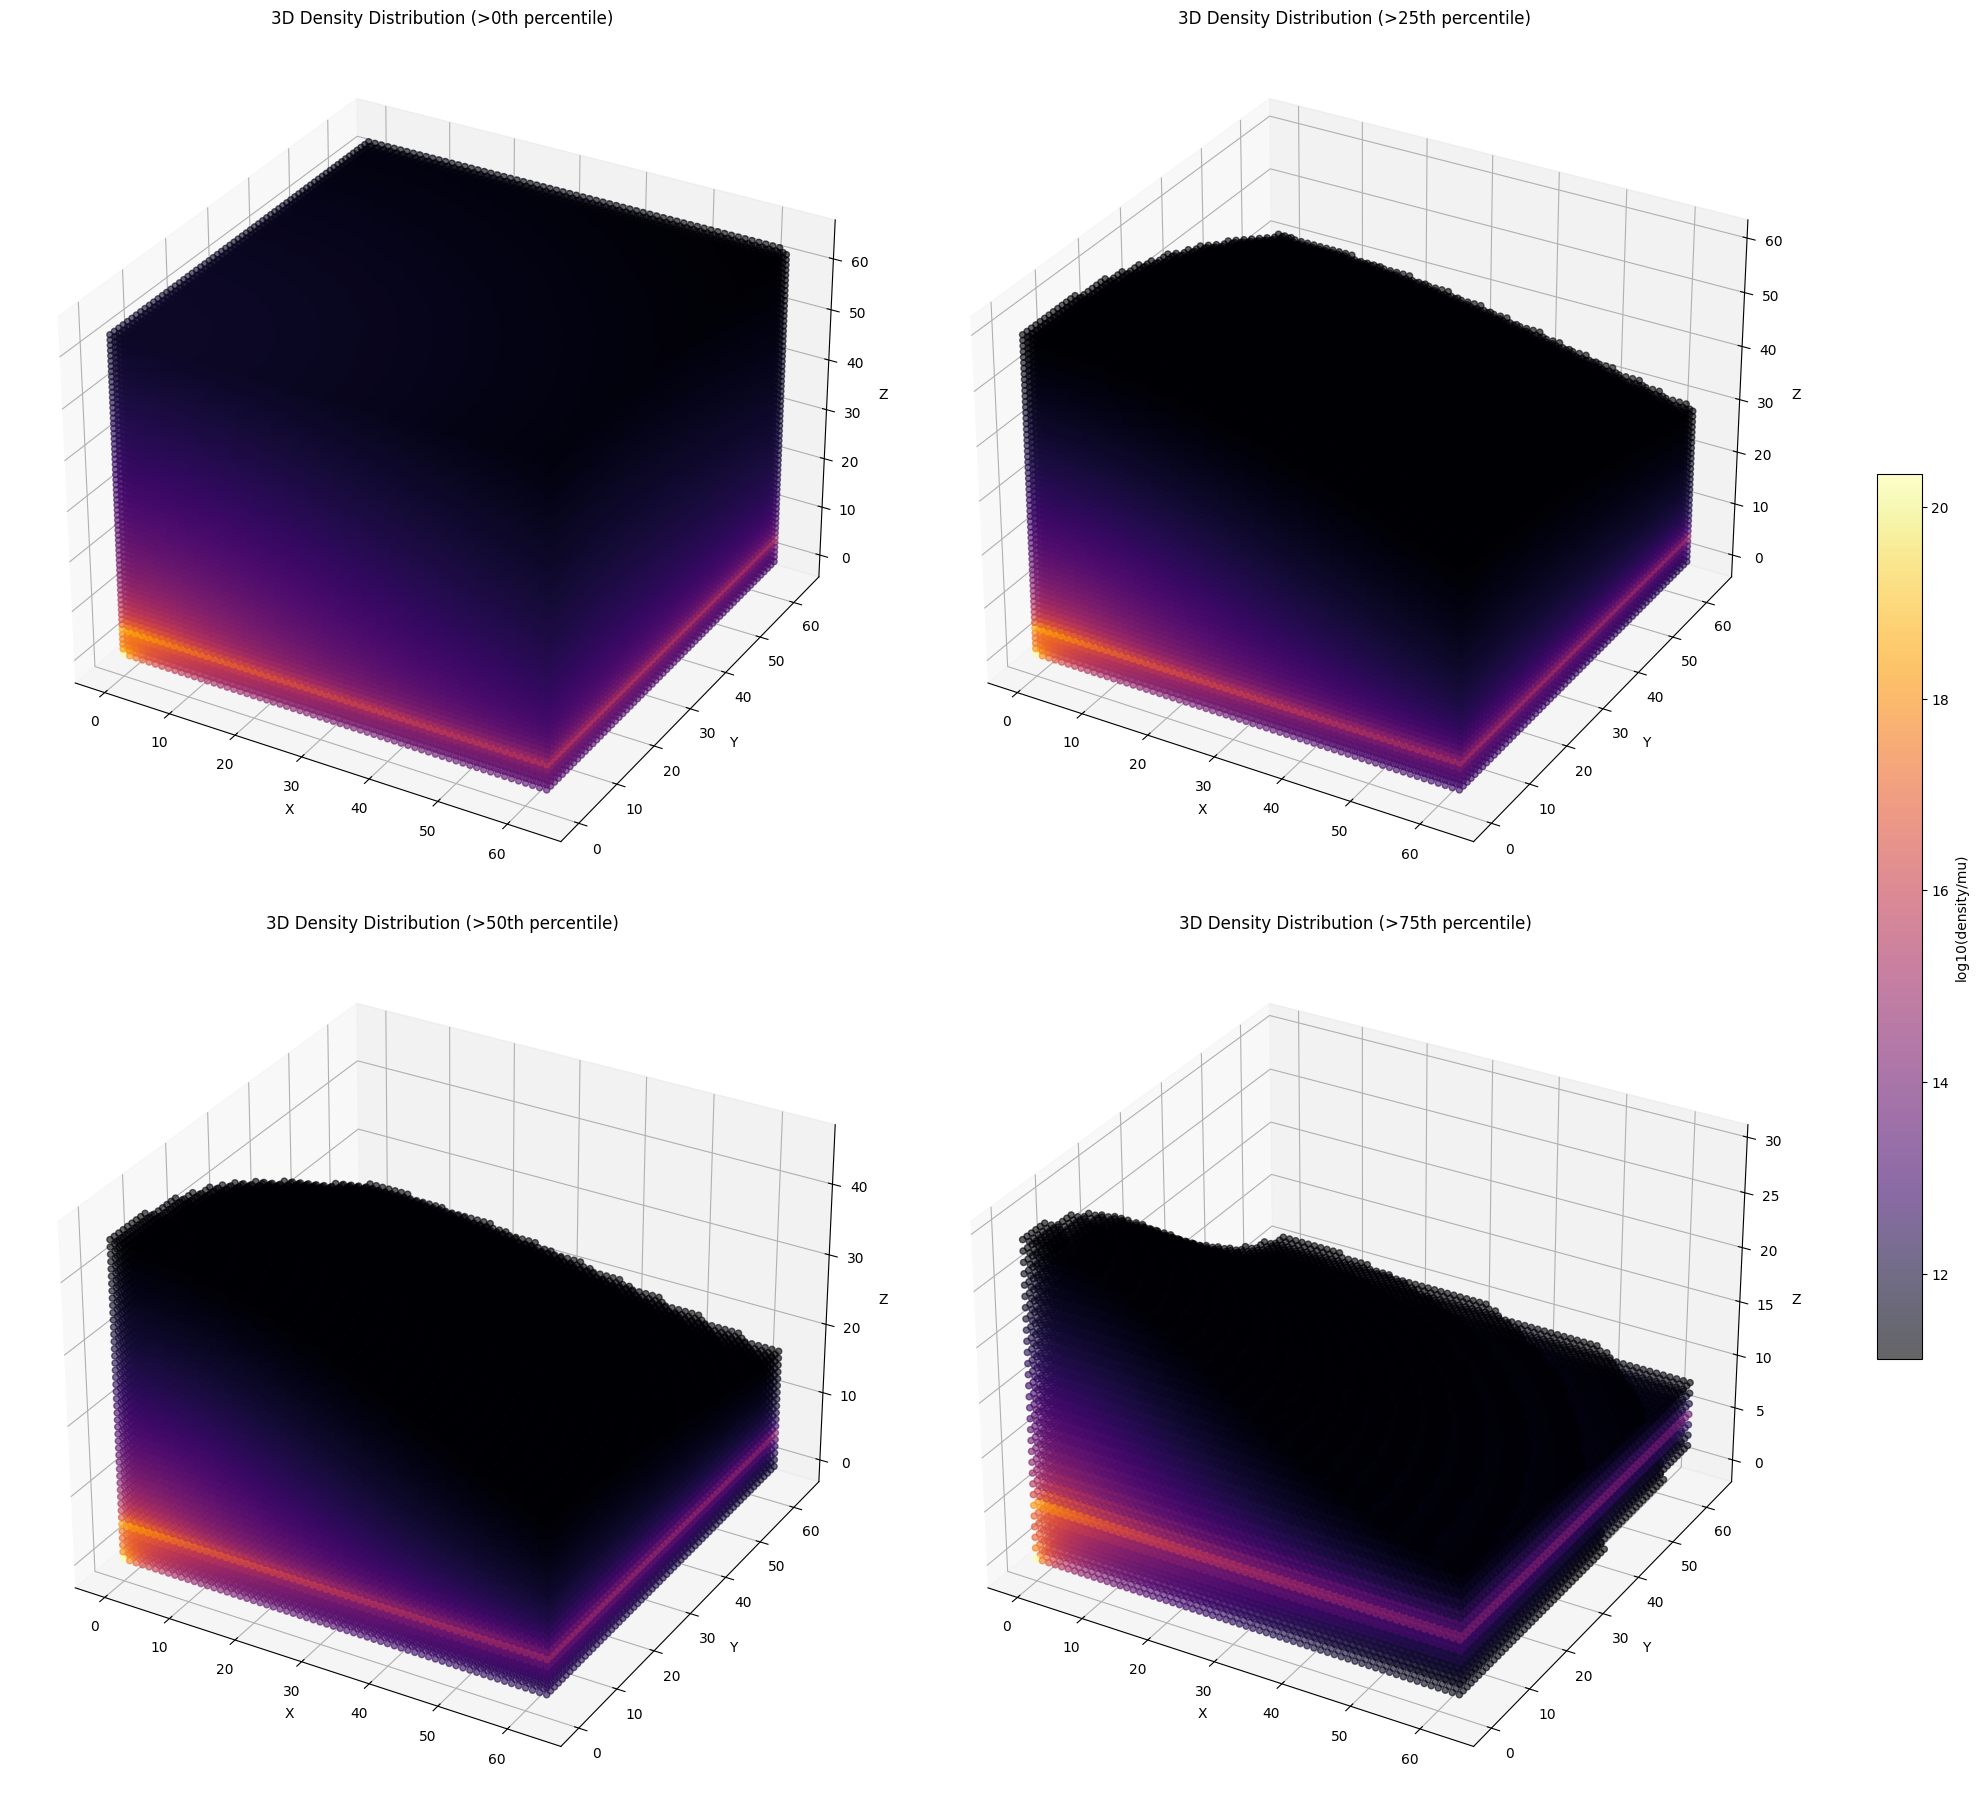

In [2]:
import numpy as np
import matplotlib.pyplot as plt

wind_density_data = np.loadtxt('parameters/wind_density_output.csv', delimiter=',')
data_3d_correct = wind_density_data.reshape(64, 64, 64)
mu = 2.3e-24
f_xyz_full = np.log10(data_3d_correct / mu)
x_full, y_full, z_full = np.indices(f_xyz_full.shape)

percentiles = [0, 25, 50, 75]

fig, axes = plt.subplots(2, 2, figsize=(20, 18), subplot_kw={'projection': '3d'}, constrained_layout=True)
axes = axes.flatten()

for i, percentile in enumerate(percentiles):
    threshold_full = np.percentile(f_xyz_full, percentile)
    mask_full = f_xyz_full > threshold_full
    x_plot_full, y_plot_full, z_plot_full = x_full[mask_full], y_full[mask_full], z_full[mask_full]
    f_xyz_plot_full = f_xyz_full[mask_full]

    scatter = axes[i].scatter(x_plot_full, y_plot_full, z_plot_full, c=f_xyz_plot_full, cmap='inferno', marker='o', alpha=0.6)
    axes[i].set_title(f'3D Density Distribution (>{percentile}th percentile)')
    axes[i].set_xlabel('X')
    axes[i].set_ylabel('Y')
    axes[i].set_zlabel('Z')

fig.colorbar(scatter, ax=axes.ravel().tolist(), shrink=0.5, aspect=20, label='log10(density/mu)')

plt.savefig('3d_density_distributions.png', dpi=300, format='png')
plt.show()

